In [2]:
import pandas as pd
import numpy as np 

data = pd.read_csv("서울시 부동산 실거래가 정보(2022~2025).csv", encoding = 'cp949', low_memory = False)
data.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2025,11320,도봉구,10600,방학동,1.0,대지,0638,0010,한신빌라(638-10),...,14800,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,39620,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN
2,2025,11500,강서구,10200,등촌동,1.0,대지,0628,0013,현대프린스텔,...,10300,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구
3,2025,11620,관악구,10200,신림동,1.0,대지,1639,0051,푸리마타운,...,12700,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구
4,2025,11530,구로구,10600,고척동,1.0,대지,0339,0000,고척파크푸르지오,...,84000,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구"


In [3]:
data.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235671 entries, 0 to 235670
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접수연도              235671 non-null  int64  
 1   자치구코드             235671 non-null  int64  
 2   자치구명              235670 non-null  object 
 3   법정동코드             235671 non-null  int64  
 4   법정동명              235671 non-null  object 
 5   지번구분              224553 non-null  float64
 6   지번구분명             224553 non-null  object 
 7   본번                224555 non-null  object 
 8   부번                224555 non-null  object 
 9   건물명               224535 non-null  object 
 10  계약일               235671 non-null  int64  
 11  물건금액(만원)          235671 non-null  int64  
 12  건물면적(㎡)           235671 non-null  float64
 13  토지면적(㎡)           230520 non-null  float64
 14  층                 224577 non-null  float64
 15  권리구분              1726 non-null    object 
 16  취소일               12

In [5]:
data.describe

<bound method NDFrame.describe of         접수연도  자치구코드 자치구명  법정동코드 법정동명  지번구분 지번구분명    본번    부번            건물명  \
0       2025  11320  도봉구  10600  방학동   1.0    대지  0638  0010   한신빌라(638-10)   
1       2025  11380  은평구  10800  역촌동   NaN   NaN   NaN   NaN            NaN   
2       2025  11500  강서구  10200  등촌동   1.0    대지  0628  0013         현대프린스텔   
3       2025  11620  관악구  10200  신림동   1.0    대지  1639  0051          푸리마타운   
4       2025  11530  구로구  10600  고척동   1.0    대지  0339  0000       고척파크푸르지오   
...      ...    ...  ...    ...  ...   ...   ...   ...   ...            ...   
235666  2022  11110  종로구  18600  신영동   NaN   NaN   NaN   NaN            NaN   
235667  2022  11290  성북구  13300  정릉동   1.0    대지  0260  0010  진안빌라A(260-10)   
235668  2022  11290  성북구  13300  정릉동   NaN   NaN   NaN   NaN            NaN   
235669  2022  11290  성북구  13300  정릉동   1.0    대지  0260  0010  진안빌라A(260-10)   
235670  2022  11650  서초구  10300  우면동   1.0    대지  0070  0000            코오롱   

        ...  물건금액

In [7]:
# '물건금액(만원)' 열을 숫자로 변환
data['물건금액(만원)'] = pd.to_numeric(data['물건금액(만원)'], errors='coerce')

# '계약일'을 날짜 형식으로 변환
data['계약일'] = pd.to_datetime(data['계약일'], format='%Y%m%d')

# '건축년도'가 이상한 값을 가지고 있다면 제거
data = data[data['건축년도'] > 1900]

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 232644 entries, 0 to 235670
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   접수연도              232644 non-null  int64         
 1   자치구코드             232644 non-null  int64         
 2   자치구명              232644 non-null  object        
 3   법정동코드             232644 non-null  int64         
 4   법정동명              232644 non-null  object        
 5   지번구분              221614 non-null  float64       
 6   지번구분명             221614 non-null  object        
 7   본번                221616 non-null  object        
 8   부번                221616 non-null  object        
 9   건물명               221596 non-null  object        
 10  계약일               232644 non-null  datetime64[ns]
 11  물건금액(만원)          232644 non-null  int64         
 12  건물면적(㎡)           232644 non-null  float64       
 13  토지면적(㎡)           227493 non-null  float64       
 14  층        

In [8]:
# 자치구별 평균 물건금액
district_avg = data.groupby('자치구명')['물건금액(만원)'].mean().sort_values(ascending=False)

# 건물용도별 평균 물건금액
usage_avg = data.groupby('건물용도')['물건금액(만원)'].mean().sort_values(ascending=False)

# 연도별 평균 물건금액
data['년도'] = data['계약일'].dt.year
yearly_avg = data.groupby('년도')['물건금액(만원)'].mean()

print("자치구별 평균 물건금액:")
print(district_avg)
print("\n건물용도별 평균 물건금액:")
print(usage_avg)
print("\n연도별 평균 물건금액:")
print(yearly_avg)


자치구별 평균 물건금액:
자치구명
강남구     173618.247860
용산구     159709.435346
서초구     158547.809390
성동구     122974.187900
송파구     106277.240848
마포구      79333.239284
동작구      78231.075050
영등포구     76496.242329
중구       74378.232955
광진구      73015.525286
양천구      72142.122340
강동구      71142.057888
종로구      70538.410102
서대문구     64521.842160
성북구      64445.919835
동대문구     61316.290650
노원구      55128.564218
관악구      48711.916519
은평구      45672.502983
중랑구      45610.962101
구로구      43600.024127
강서구      41284.323744
도봉구      38143.913543
금천구      37903.963634
강북구      36311.233224
Name: 물건금액(만원), dtype: float64

건물용도별 평균 물건금액:
건물용도
단독다가구    186054.310376
아파트      112088.342806
연립다세대     34800.183017
오피스텔      26341.509834
Name: 물건금액(만원), dtype: float64

연도별 평균 물건금액:
년도
2009     8000.000000
2013    42300.000000
2016    52960.000000
2017    22500.000000
2018    85250.000000
2019    18008.500000
2020    78415.320000
2021    74467.930091
2022    56201.293054
2023    76228.616271
2024    88017.482736
2025    

C:\Users\user\AppData\Local\Temp\ipykernel_20812\3556412371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['년도'] = data['계약일'].dt.year


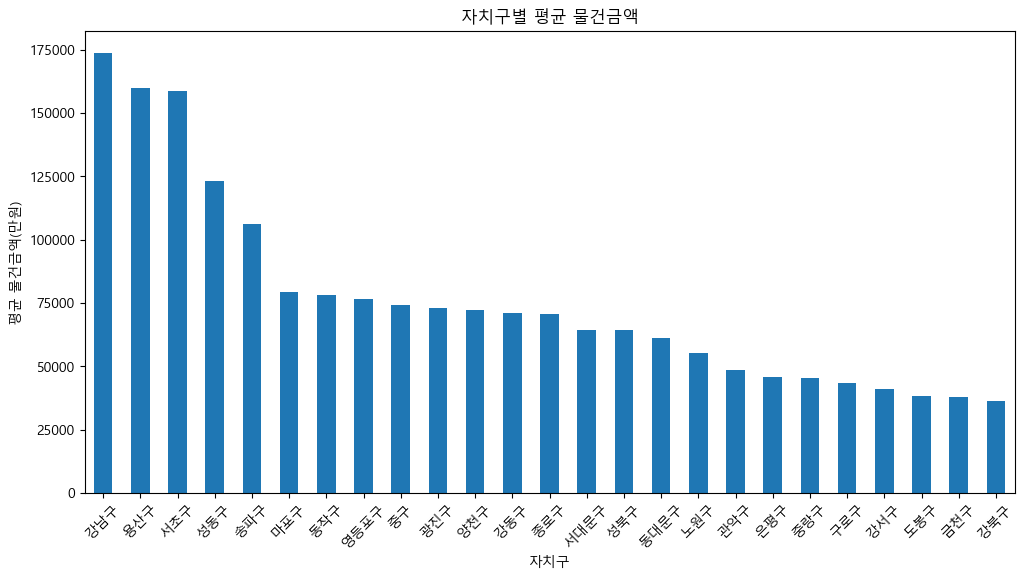

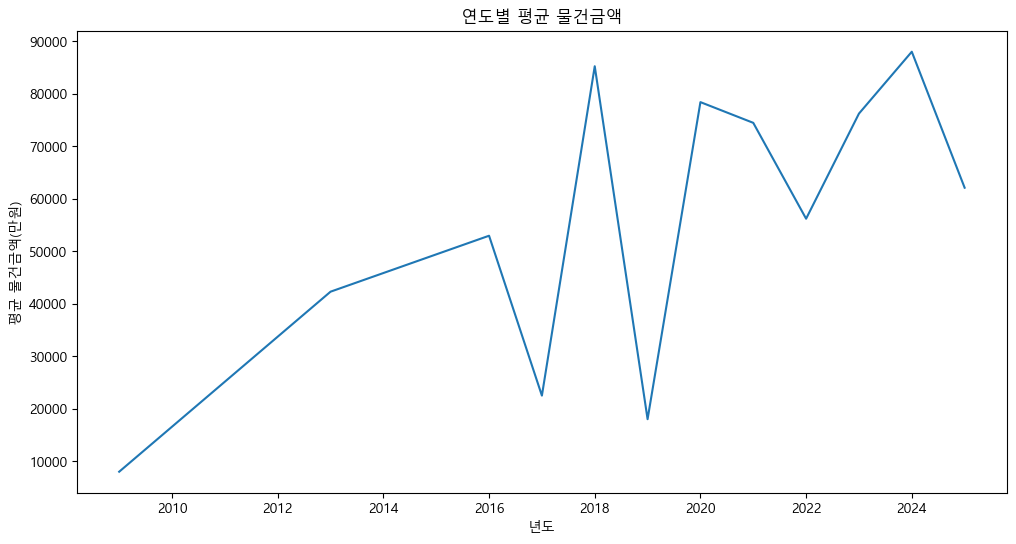

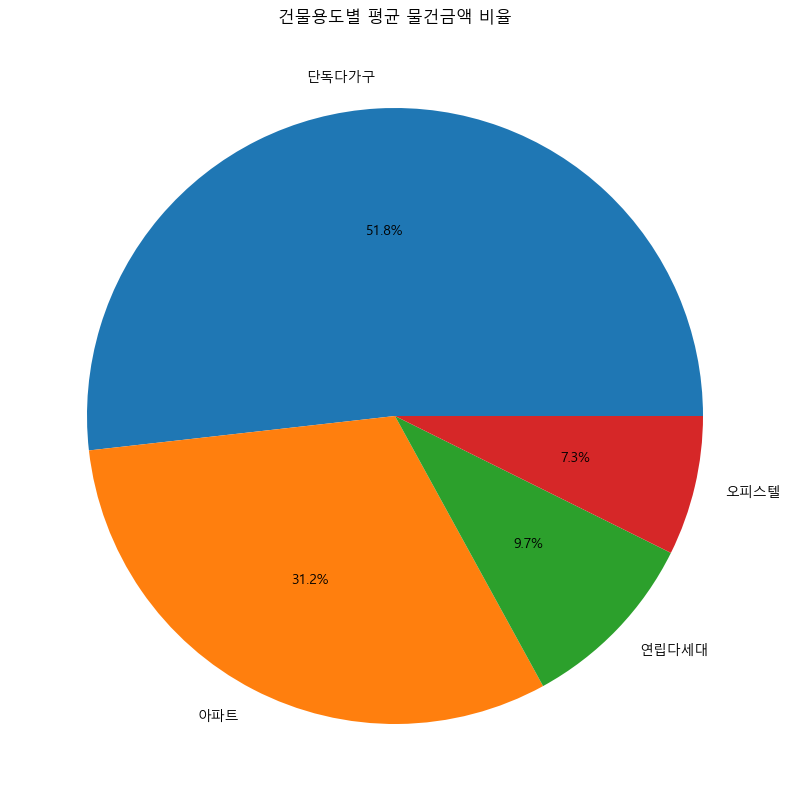

In [11]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 자치구별 평균 물건금액 그래프
plt.figure(figsize=(12, 6))
district_avg.plot(kind='bar')
plt.title('자치구별 평균 물건금액')
plt.xlabel('자치구')
plt.ylabel('평균 물건금액(만원)')
plt.xticks(rotation=45)
plt.show()

# 연도별 평균 물건금액 그래프
plt.figure(figsize=(12, 6))
yearly_avg.plot()
plt.title('연도별 평균 물건금액')
plt.xlabel('년도')
plt.ylabel('평균 물건금액(만원)')
plt.show()

# 건물용도별 평균 물건금액 파이 차트
plt.figure(figsize=(10, 10))
usage_avg.plot(kind='pie', autopct='%1.1f%%')
plt.title('건물용도별 평균 물건금액 비율')
plt.ylabel('')
plt.show()


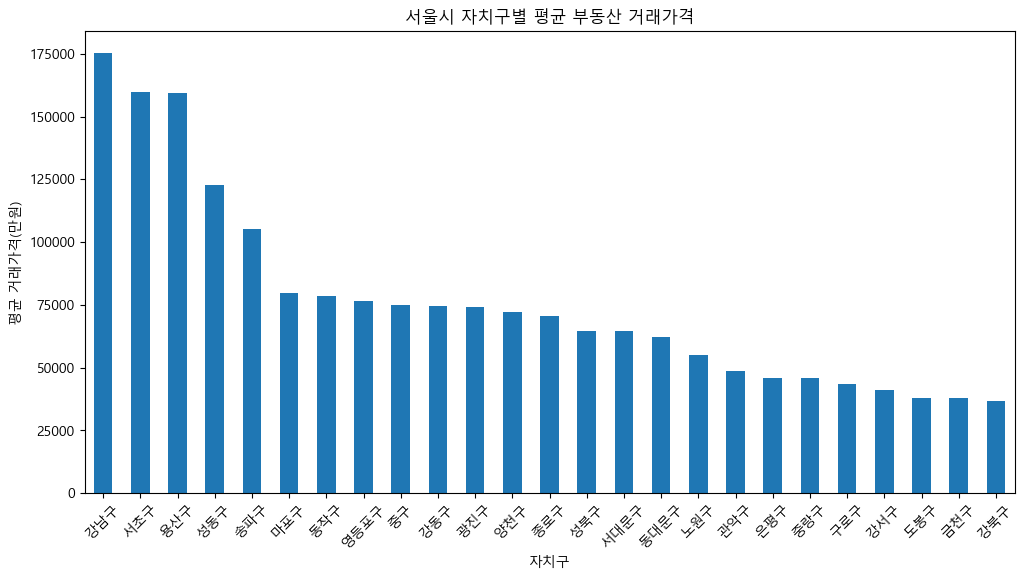

건물용도별 평균 거래가격:
건물용도
단독다가구    185679.540562
아파트      112843.207165
연립다세대     34803.140170
오피스텔      27230.158624
Name: 물건금액(만원), dtype: float64


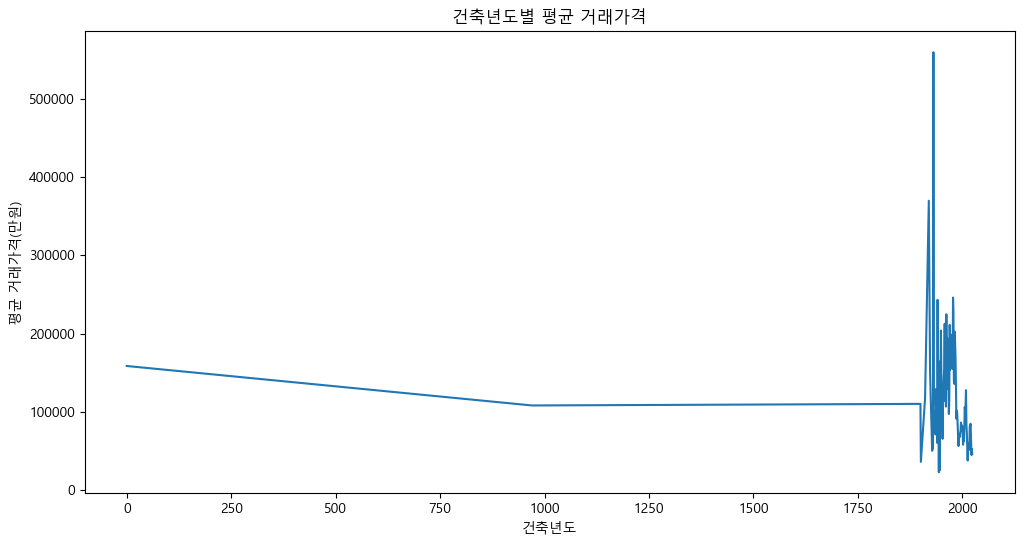

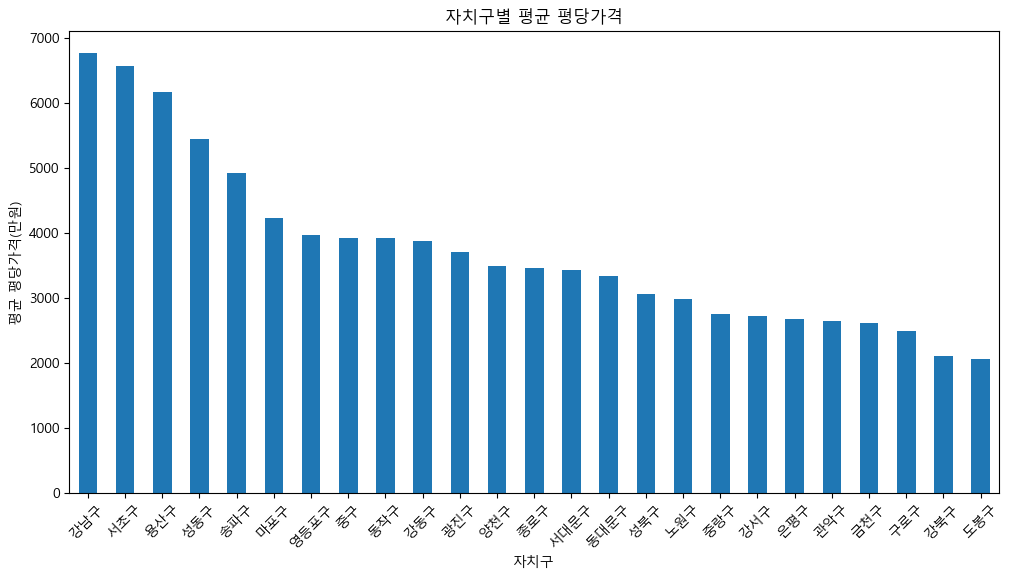

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("서울시 부동산 실거래가 정보(2022~2025).csv", encoding = 'cp949', low_memory = False)

# 데이터 전처리
df['계약일'] = pd.to_datetime(df['계약일'])
df['물건금액(만원)'] = pd.to_numeric(df['물건금액(만원)'], errors='coerce')

# 자치구별 평균 거래가격 계산
district_avg = df.groupby('자치구명')['물건금액(만원)'].mean().sort_values(ascending=False)

# 자치구별 평균 거래가격 막대 그래프
plt.figure(figsize=(12, 6))
district_avg.plot(kind='bar')
plt.title('서울시 자치구별 평균 부동산 거래가격')
plt.xlabel('자치구')
plt.ylabel('평균 거래가격(만원)')
plt.xticks(rotation=45)
plt.show()

# 건물용도별 평균 거래가격 계산
usage_avg = df.groupby('건물용도')['물건금액(만원)'].mean().sort_values(ascending=False)

print("건물용도별 평균 거래가격:")
print(usage_avg)

# 추가 분석: 건축년도별 평균 거래가격
df['건축년도'] = pd.to_numeric(df['건축년도'], errors='coerce')
age_avg = df.groupby('건축년도')['물건금액(만원)'].mean()

plt.figure(figsize=(12, 6))
age_avg.plot(kind='line')
plt.title('건축년도별 평균 거래가격')
plt.xlabel('건축년도')
plt.ylabel('평균 거래가격(만원)')
plt.show()

# 면적당 가격 계산 및 분석
df['평당가격'] = df['물건금액(만원)'] / (df['건물면적(㎡)'] / 3.3)
area_price = df.groupby('자치구명')['평당가격'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
area_price.plot(kind='bar')
plt.title('자치구별 평균 평당가격')
plt.xlabel('자치구')
plt.ylabel('평균 평당가격(만원)')
plt.xticks(rotation=45)
plt.show()


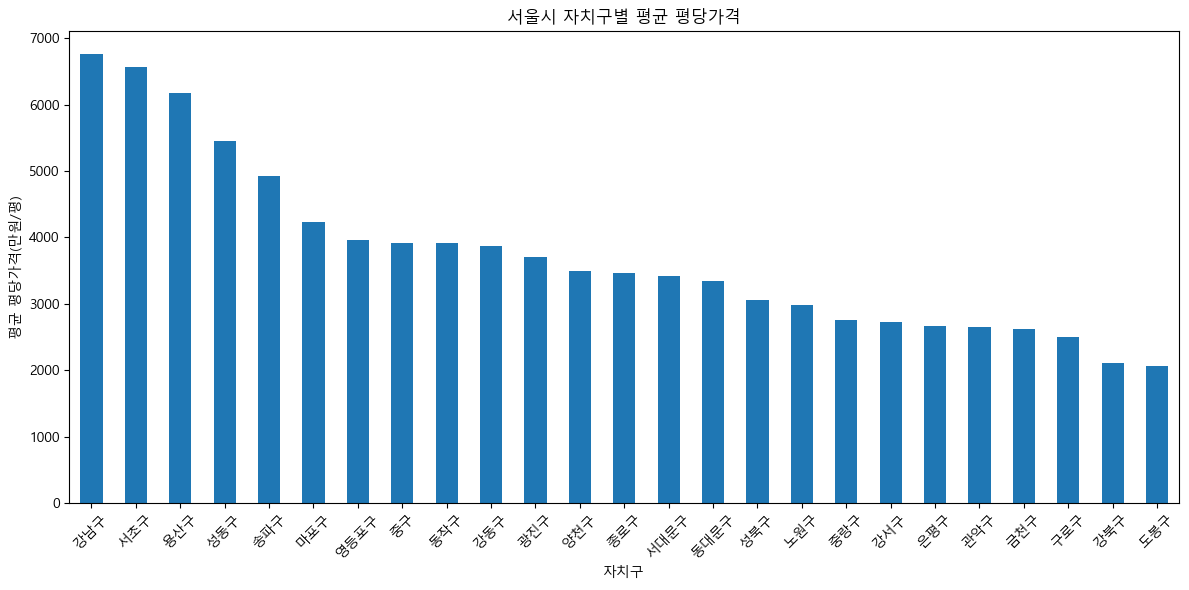

건물용도별 평균 거래가격:
건물용도
단독다가구    185679.540562
아파트      112843.207165
연립다세대     34803.140170
오피스텔      27230.158624
Name: 물건금액(만원), dtype: float64


In [21]:
# 데이터 전처리
df['계약일'] = pd.to_datetime(df['계약일'])
df['물건금액(만원)'] = pd.to_numeric(df['물건금액(만원)'], errors='coerce')

# 평당가격 계산
df['평당가격'] = df['물건금액(만원)'] / (df['건물면적(㎡)'] / 3.3)

# 자치구별 평균 평당가격 계산
area_price = df.groupby('자치구명')['평당가격'].mean().sort_values(ascending=False)

# 자치구별 평균 평당가격 시각화
plt.figure(figsize=(12, 6))
area_price.plot(kind='bar')
plt.title('서울시 자치구별 평균 평당가격')
plt.xlabel('자치구')
plt.ylabel('평균 평당가격(만원/평)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 건물용도별 평균 거래가격
usage_avg = df.groupby('건물용도')['물건금액(만원)'].mean().sort_values(ascending=False)
print("건물용도별 평균 거래가격:")
print(usage_avg)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
file_path = '서울시_생활인구_내국인_2023.csv'
df = pd.read_csv(file_path, encoding='cp949')

# 2. 데이터 전처리
# 필요한 열만 선택
df = df[['자치구명', '총인구', '성별', '연령대', '인구수']]

# 결측치 확인 및 처리
print(df.isnull().sum())
df = df.dropna()  # 결측치가 있다면 제거

# 3. 기본 통계 확인
print(df.describe())

# 4. 자치구별 총인구 분석
district_population = df.groupby('자치구명')['총인구'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
district_population.plot(kind='bar')
plt.title('자치구별 평균 생활인구')
plt.xlabel('자치구')
plt.ylabel('평균 생활인구')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. 성별 인구 분포
gender_population = df.groupby('성별')['인구수'].sum()

plt.figure(figsize=(8, 8))
plt.pie(gender_population, labels=gender_population.index, autopct='%1.1f%%')
plt.title('성별 인구 분포')
plt.show()

# 6. 연령대별 인구 분포
age_population = df.groupby('연령대')['인구수'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
age_population.plot(kind='bar')
plt.title('연령대별 인구 분포')
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.show()

# 7. 자치구별, 연령대별 인구 분포 히트맵
pivot_df = df.pivot_table(values='인구수', index='자치구명', columns='연령대', aggfunc='sum')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_df, annot=True, fmt='g', cmap='YlOrRd')
plt.title('자치구별, 연령대별 인구 분포')
plt.show()

# 8. 시계열 분석 (만약 날짜 데이터가 있다면)
# df['날짜'] = pd.to_datetime(df['날짜'])
# time_series = df.groupby('날짜')['총인구'].sum()
# time_series.plot(figsize=(12, 6))
# plt.title('일별 총 생활인구 변화')
# plt.xlabel('날짜')
# plt.ylabel('총 생활인구')
# plt.show()


KeyError: "None of [Index(['자치구명', '총인구', '성별', '연령대', '인구수'], dtype='object')] are in the [columns]"

In [28]:
import pandas as pd
import numpy as np 

data = pd.read_csv("1인가구(연령별)_20250217214123.csv")
data.head()

,자치구별(1),자치구별(2),성별(1),2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11,2023.12,2023.13,2023.14,2023.15
0,자치구별(1),자치구별(2),성별(1),합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),성별(1),소계,20세미만,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
2,합계,소계,계,1627480,12508,132540,283426,240530,136268,109198,86783,96608,88560,106711,104700,77112,64818,51315,36403
3,합계,소계,남자,760084,4966,47317,129889,130881,76295,60636,49170,56124,49124,51605,42435,25664,17197,11495,7286
4,합계,소계,여자,867396,7542,85223,153537,109649,59973,48562,37613,40484,39436,55106,62265,51448,47621,39820,29117


In [29]:
data.columns

Index(['자치구별(1)', '자치구별(2)', '성별(1)', '2023', '2023.1', '2023.2', '2023.3',
       '2023.4', '2023.5', '2023.6', '2023.7', '2023.8', '2023.9', '2023.10',
       '2023.11', '2023.12', '2023.13', '2023.14', '2023.15'],
      dtype='object')

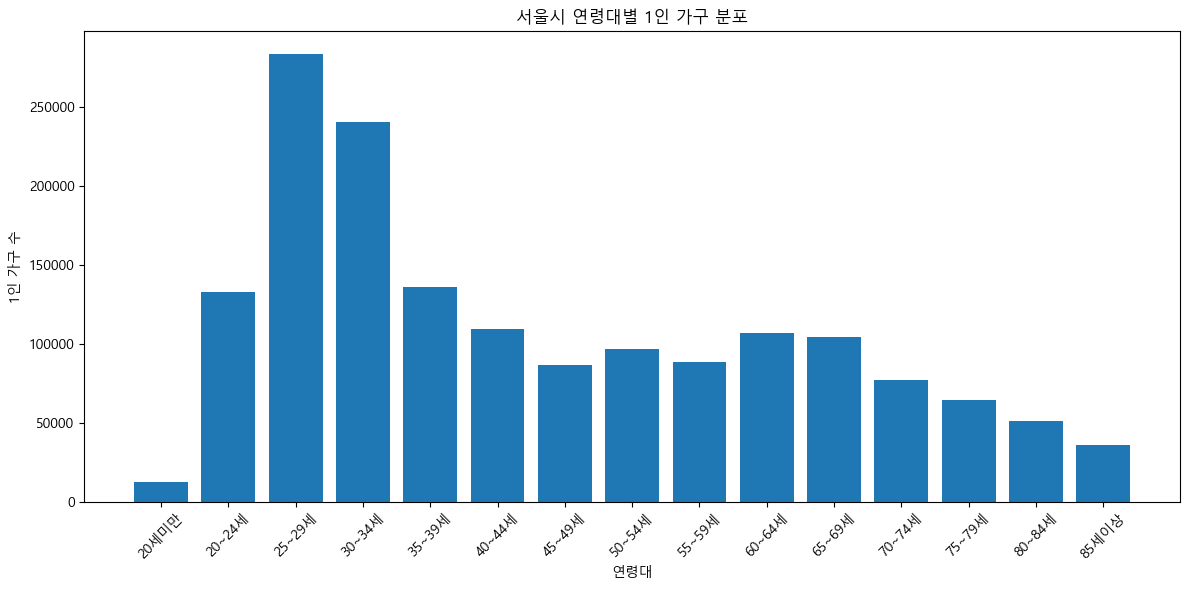

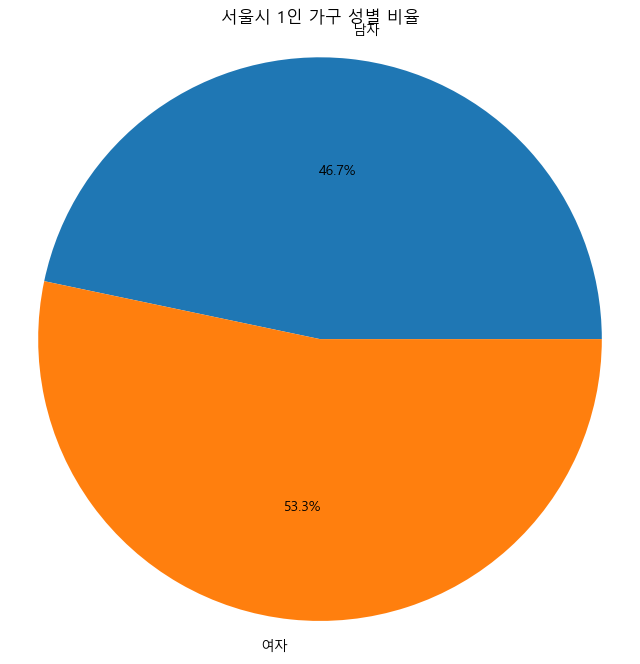

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    ['합계', '소계', '계', 1627480, 12508, 132540, 283426, 240530, 136268, 109198, 86783, 96608, 88560, 106711, 104700, 77112, 64818, 51315, 36403],
    ['합계', '소계', '남자', 760084, 4966, 47317, 129889, 130881, 76295, 60636, 49170, 56124, 49124, 51605, 42435, 25664, 17197, 11495, 7286],
    ['합계', '소계', '여자', 867396, 7542, 85223, 153537, 109649, 59973, 48562, 37613, 40484, 39436, 55106, 62265, 51448, 47621, 39820, 29117]
]

columns = ['자치구별(1)', '자치구별(2)', '성별(1)', '합계', '20세미만', '20~24세', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85세이상']

df = pd.DataFrame(data, columns=columns)

# 연령대별 1인 가구 분포 시각화
age_groups = columns[4:]
values = df[df['성별(1)'] == '계'][age_groups].values[0]

plt.figure(figsize=(12, 6))
plt.bar(age_groups, values)
plt.title('서울시 연령대별 1인 가구 분포')
plt.xlabel('연령대')
plt.ylabel('1인 가구 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

total = df[df['성별(1)'] == '계']['합계'].values[0]
male = df[df['성별(1)'] == '남자']['합계'].values[0]
female = df[df['성별(1)'] == '여자']['합계'].values[0]

plt.figure(figsize=(8, 8))
plt.pie([male, female], labels=['남자', '여자'], autopct='%1.1f%%')
plt.title('서울시 1인 가구 성별 비율')
plt.axis('equal')
plt.show()
